# GARCH Stock Forecasting

## Read Data

In [103]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [104]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [105]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [106]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

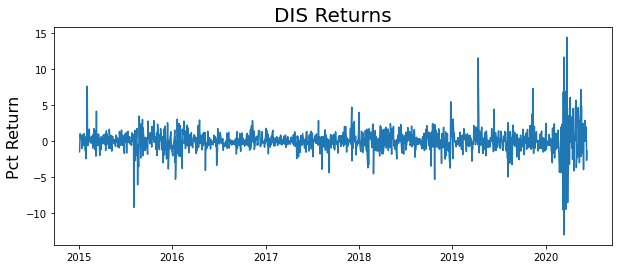

In [107]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

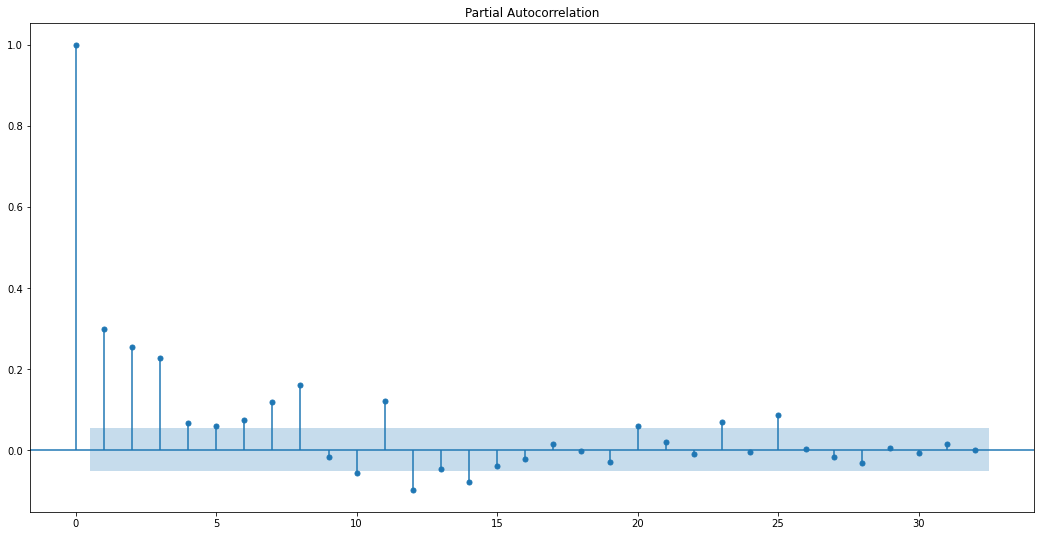

In [108]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [109]:
model = arch_model(returns, p=3, q=3)

In [110]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 211297145435.1136
Iteration:      2,   Func. Count:     22,   Neg. LLF: 983187686.6394435
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2732.2839564722976
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.188369315234
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2323.1605931368404
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2330.182247916406
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2401.748206600305
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2391.85347371648
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2299.079965616726
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2299.083237868365
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2298.9516134212854
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2298.9391230170268
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2298.9239034639913
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2298.9

In [111]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2298.92
Distribution:                  Normal   AIC:                           4613.84
Method:            Maximum Likelihood   BIC:                           4655.61
                                        No. Observations:                 1368
Date:                Sun, Dec 05 2021   Df Residuals:                     1367
Time:                        14:22:45   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.0139e-03  4.319e-02     -0.162      0.871 [-9.167e-02,7.764e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5417      0.189      2.860  4.231e-03    [  0.171,  0.913]
alpha[1]       0.0684  3.947e-02      1.733  8.314e-02 [-8.968e-03,  0.146]
alpha[2]       0.2032  9.867e-02      2.060  3.943e-02  [9.836e-03,  0.397]
alpha[3]       0.3177      0.152      2.096  3.604e-02  [2.068e-02,  0.615]
beta[1]        0.0000      0.162      0.000      1.000    [ -0.318,  0.318]
beta[2]    1.5341e-14  9.634e-02  1.592e-13      1.000    [ -0.189,  0.189]
beta[3]        0.2296      0.168      1.370      0.171 [-9.880e-02,  0.558]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [112]:
model = arch_model(returns, p=3, q=0)

In [113]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3359.6816259476745
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8810.443317627338
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2256855.02298939
Iteration:      4,   Func. Count:     31,   Neg. LLF: 576570.4714035667
Iteration:      5,   Func. Count:     38,   Neg. LLF: 15039.623636712518
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2514.893164407934
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2448.3488497386024
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2314.879825146533
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2314.2849180053518
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2314.1439921690726
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2314.077972605636
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2314.0771981532744
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2314.0771928631893
Iteration:     14,   Func. Count:     95,   Neg. LLF: 2314

In [114]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2314.08
Distribution:                  Normal   AIC:                           4638.15
Method:            Maximum Likelihood   BIC:                           4664.26
                                        No. Observations:                 1368
Date:                Sun, Dec 05 2021   Df Residuals:                     1367
Time:                        14:22:45   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.7995e-03  3.990e-02      0.246      0.806 [-6.841e-02,8.801e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8619      0.138      6.230  4.678e-10    [  0.591,  1.133]
alpha[1]       0.0886  4.530e-02      1.956  5.052e-02 [-2.021e-04,  0.177]
alpha[2]       0.2621  9.123e-02      2.873  4.060e-03  [8.334e-02,  0.441]
alpha[3]       0.3558      0.169      2.102  3.559e-02  [2.397e-02,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [115]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [116]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

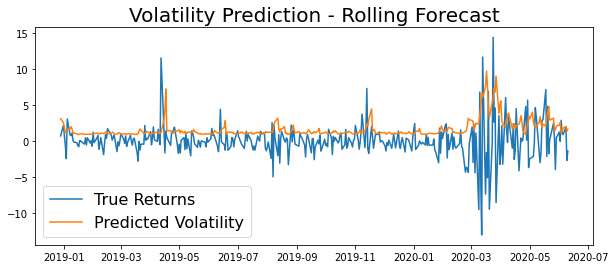

In [117]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [118]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [119]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [151]:
spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,97.195297
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,93.394379
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,93.561485
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,92.057793
2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,97.404160
...,...,...,...,...,...,...
2020-06-04,313.000000,309.079987,311.109985,311.359985,75794400.0,304.470886
2020-06-05,321.269989,317.160004,317.230011,319.339996,150524700.0,312.274353
2020-06-08,323.410004,319.630005,320.220001,323.200012,73641200.0,316.049011


In [148]:
returns = 100 * spy.Close.pct_change().dropna()
print(type(spy.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Text(0.5, 1.0, 'SPY Returns')

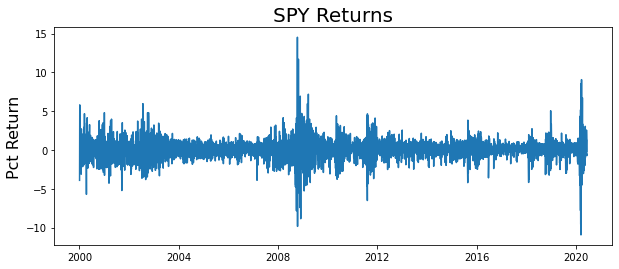

In [121]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

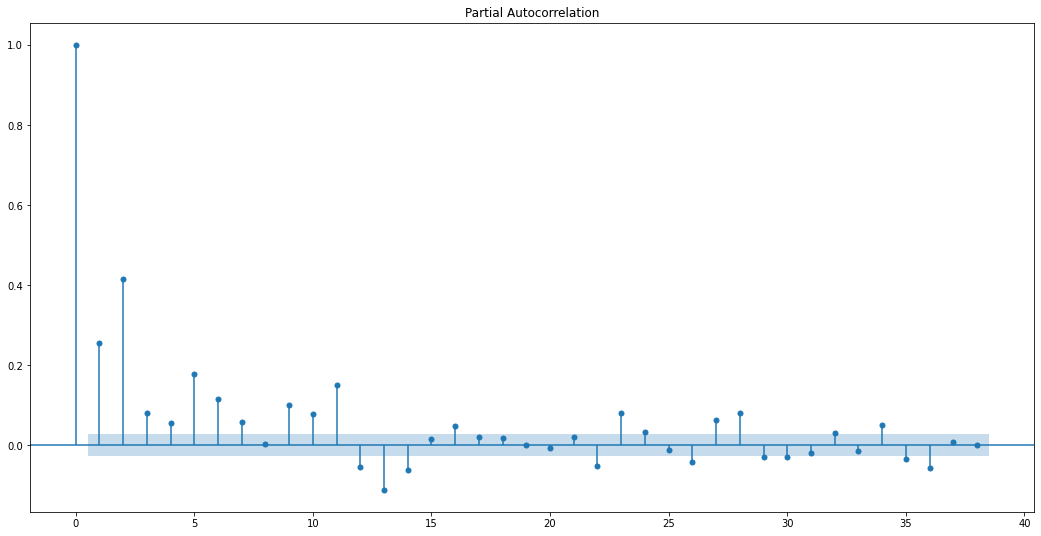

In [122]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [123]:
model = arch_model(returns, p=2, q=2)

In [124]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95620.69814392301
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56371.80164298938
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11215.314828394296
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13888.451566168835
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2135755861.8495898
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7231.193566311684
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7089.763990919695
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7056.837955966228
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7055.799793608061
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7053.566838698662
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7053.566735137116
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7053.56673513466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7053.566735137116
            Iterations: 12

In [125]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7053.57
Distribution:                  Normal   AIC:                           14119.1
Method:            Maximum Likelihood   BIC:                           14158.4
                                        No. Observations:                 5141
Date:                Sun, Dec 05 2021   Df Residuals:                     5140
Time:                        14:23:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.054  1.411e-09 [4.486e-02,8.782e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0407  9.930e-03      4.094  4.245e-05 [2.119e-02,6.011e-02]
alpha[1]       0.0809  2.203e-02      3.673  2.396e-04   [3.775e-02,  0.124]
alpha[2]       0.1331  3.037e-02      4.382  1.175e-05   [7.356e-02,  0.193]
beta[1]        0.2976      0.293      1.014      0.310     [ -0.277,  0.873]
beta[2]        0.4592      0.258      1.777  7.563e-02  [-4.739e-02,  0.966]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [126]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [127]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

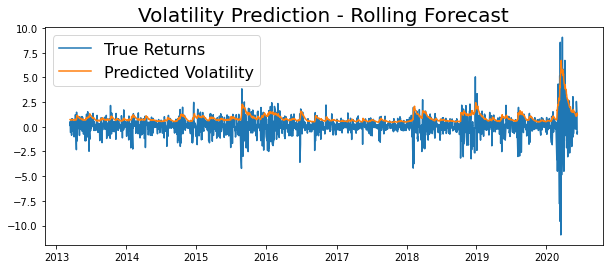

In [128]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [129]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [132]:
pred = model_fit.forecast(horizon=7, reindex=True)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

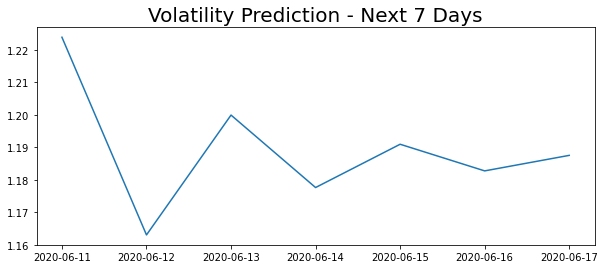

In [131]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [149]:
returns.index[-1]

Timestamp('2020-06-10 00:00:00')

In [150]:
returns

Date
2000-01-04   -3.910615
2000-01-05    0.178891
2000-01-06   -1.607143
2000-01-07    5.807623
2000-01-10    0.343053
                ...   
2020-06-04   -0.262671
2020-06-05    2.562953
2020-06-08    1.208748
2020-06-09   -0.745669
2020-06-10   -0.558000
Name: Close, Length: 5141, dtype: float64